In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Premier League - Statistics

In [2]:
#My dataset 
df_pl = pd.read_csv('/work/EPL_standings_2000-2022.csv', header=0, sep=',')
df_pl.rename(columns={'Pos': 'Position', 'Pld': 'Matchs', 'W': 'Wins', 'D': 'Draws', 
'L': 'Losses', 'GF': 'Goals Scored', 'GA': 'Goals Conceded', 'GD': 'Goals difference'}, inplace=True)
df_pl.head()

,Season,Position,Team,Matchs,Wins,Draws,Losses,Goals Scored,Goals Conceded,Goals difference,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


## General Summarize

### Red devils's - (2000-2010)

In [3]:
#Seasons
years = np.array(list(range(2000, 2022)), dtype=str)
numbers= np.array(list(range(1, 23)), dtype=str)
season = []
for year, num in zip(years, numbers):
    if int(num) < 10:
        season.append(year+'-'+'0'+num)
    else:
        season.append(year+'-'+num)
season

['2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20',
 '2020-21',
 '2021-22']

In [4]:
#Build dataset about statistics of PL in the first decade of XXI century.
df_decade1 = df_pl.copy()
df_years = pd.DataFrame({
    'Season': season,
    'Year': np.arange(2000, 2022)
})
df_decade1 = pd.merge(left=df_decade1, right=df_years, on='Season', how='outer')
df_decade1.drop('Season', axis=1, inplace=True)
df_decade1 = df_decade1[df_decade1.Year <=2010]
df_decade1.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [5]:
#How many matchs there were during this decade?
matches = df_decade1.loc[df_decade1.Team == 'Manchester United', 'Matchs']
matches = matches.sum()
matches

418

In [6]:
#Champions teams
df_champions = df_decade1.loc[df_decade1.Position == 1, ['Team', 'Year']]
df_champions.sort_values('Team', ascending=False, inplace=True)
#Top5: The most winning teams
df_wins = df_decade1.copy()
df_wins = df_wins.groupby('Team').agg({'Wins': 'sum'}).sort_values('Wins', ascending=False).head()
#Stats of Manchester United
stats_mun = df_decade1[df_decade1.Team == 'Manchester United']
stats_mun = stats_mun.pivot_table(index='Team', aggfunc={'Wins': 'sum', 'Draws': 'sum', 'Losses': 'sum'}).T
#Possible points
points_mun = df_decade1.loc[df_decade1.Team == 'Manchester United', ['Team', 'Pts']]
points_mun = points_mun.groupby('Team').agg({'Pts': 'sum'})
points_mun['Points Loss'] = matches*3 - points_mun.iloc[0, 0]
points_mun.rename(columns={'Pts': 'Points earned'}, inplace=True)
points_mun = points_mun.T

In [7]:
#Shorten the names.
df_wins.rename(index={'Manchester United': 'Man. United', 'Tottenham Hotspur': 'Tottenham'}, inplace=True)
df_wins.index[[0, -1]]

Index(['Man. United', 'Tottenham'], dtype='object', name='Team')

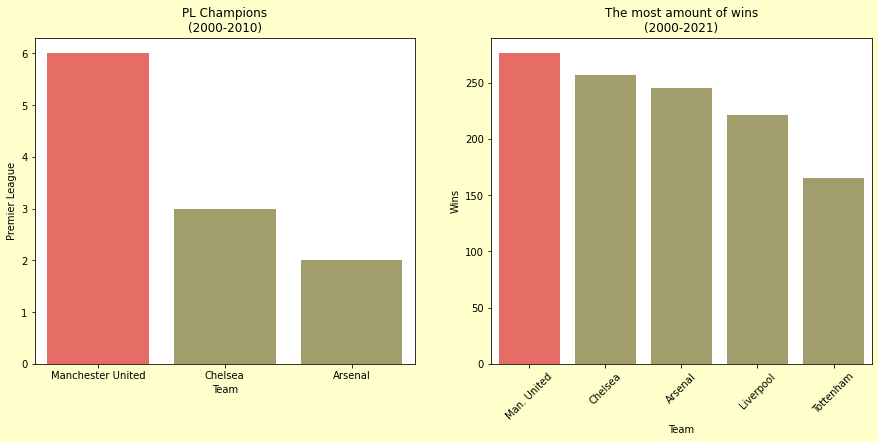

In [8]:
#Colors
palette = {team: '#AAA662' for team in df_wins.index}
palette['Man. United'] = '#FC5A50'
#Canvas
fig = plt.figure(figsize=(15, 6))
#Countplot
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(data=df_champions, x='Team', palette=palette.values())
ax1.set(ylabel='Premier League', title='PL Champions\n(2000-2010)')
#Barplot
ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(data=df_wins, x=df_wins.index, y='Wins', palette=palette.values())
ax2.set(ylabel='Wins', title='The most amount of wins\n(2000-2021)')
ax2.set_xticks(np.arange(5), df_wins.index,rotation=45)
fig.set_facecolor('#FFFFCB')
fig.show()

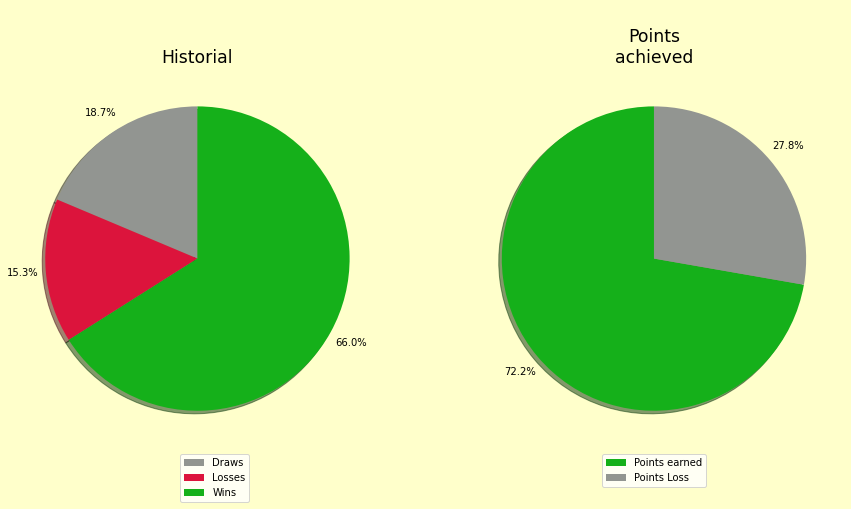

In [9]:
#Canvas
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
#Axes
#Pie chart
ax1.pie(data=stats_mun, x='Manchester United', autopct="%.1f%%", 
colors=['#929591', '#DC143C', '#15B01A'], pctdistance=1.15, shadow=True, startangle=90)
ax1.set_title('\nHistorial', fontdict={'fontsize': 'xx-large'})
ax1.legend(labels=stats_mun.index, bbox_to_anchor=(0.65, 0))
#Pie chart
ax2.pie(data=points_mun, x='Manchester United', autopct="%.1f%%", pctdistance=1.15, shadow=True,
startangle=90, colors=['#15B01A', '#929591'])
ax2.set_title('\nPoints\nachieved', fontdict={'fontsize': 'xx-large'})
ax2.legend(labels=points_mun.index, bbox_to_anchor=(0.65, 0))
fig.set_facecolor('#FFFFCB')
fig.show()

Manchester United was the best team of British football during these 10 years and they leave us with the following statistics:
* 6 Premier Leagues.
* More than 50% of matches they played ended in victory -> 276 wins in 418 matches.
* They've earned more than 70% of possible points  -> 906 / 1254 points.


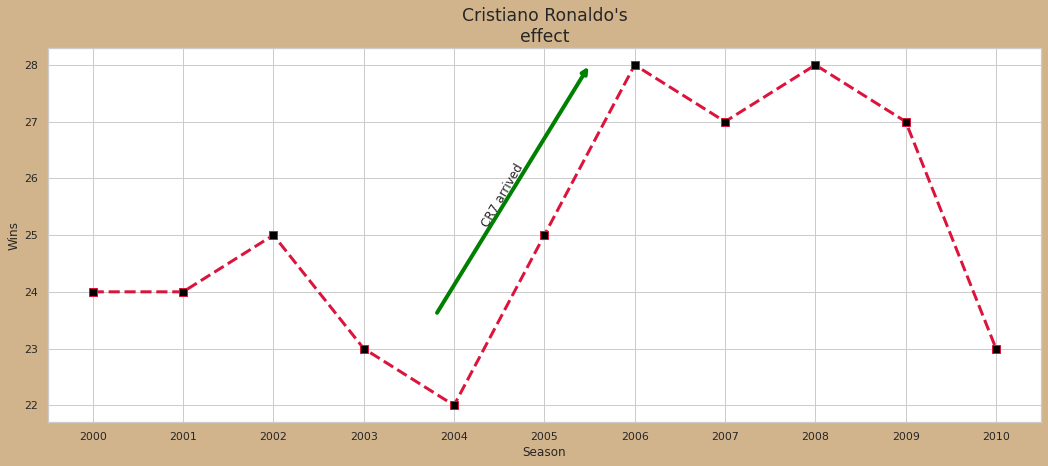

In [10]:
#The best years of United
df_mun = df_decade1
df_mun = df_mun.loc[df_mun.Team == 'Manchester United', ['Year', 'Wins']]
df_mun['Year'] = df_mun.Year.astype(str)

#Canvas
sns.set_theme(style='whitegrid')
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 2.3, 1.3])
#Line plot
ax.plot(df_mun.Year, df_mun.Wins, marker='s', linestyle='--', color='#DC143C', linewidth=3,
markersize=8, markerfacecolor='#000000')
ax.set(xlabel='Season', ylabel='Wins')
ax.set_title("Cristiano Ronaldo's\neffect", fontdict={'fontsize': 'x-large'})

#Arrow
plt.annotate(
    text='', xy=(5.5, 28),
    xytext=(3.8, 23.6), xycoords='data',
    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='#008000', lw=4)
)
#Text
plt.annotate(
    text='CR7 arrived', xy=(4.8, 25.7),
    rotation=60, va='center', ha='right'
)


fig.set_facecolor('#D2B48C')
fig.show()

In [11]:
#Years where Manchester United was champion.
team, position = df_decade1.Team == 'Manchester United', df_decade1.Position == 1
years = df_decade1.loc[team & position, ['Team', 'Position', 'Year']]
years.set_index('Year', inplace=True)
years

,Team,Position
Year,,
2000,Manchester United,1
2002,Manchester United,1
2006,Manchester United,1
2007,Manchester United,1
2008,Manchester United,1
2010,Manchester United,1


The arrival of Cristiano Ronaldo to Manchester United was a determining factor in the success  they achieved during these years. Well, this is where he developed his football skills to become the best player of the world in 2008. Likewise, he achieved to win the Premier league 3 times in a row in the years 2006, 2007 and 2008. And also during these 3 years Manchester United reached their highest winning numbers, thus demonstrating the superiority they had in British football.

In [12]:
#Analizar los goles que anotan y los que reciben a tráves de un boxplot
df_goals = df_decade1.loc[df_decade1.Team == 'Manchester United', ['Team','Goals Scored', 'Goals Conceded', 'Year']]
df_goals

,Team,Goals Scored,Goals Conceded,Year
0,Manchester United,79,31,2000
22,Manchester United,87,45,2001
40,Manchester United,74,34,2002
62,Manchester United,64,35,2003
82,Manchester United,58,26,2004
101,Manchester United,72,34,2005
120,Manchester United,83,27,2006
140,Manchester United,80,22,2007
160,Manchester United,68,24,2008
181,Manchester United,86,28,2009


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25a02e7e-55cf-475b-8f35-4cb85c25603c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>